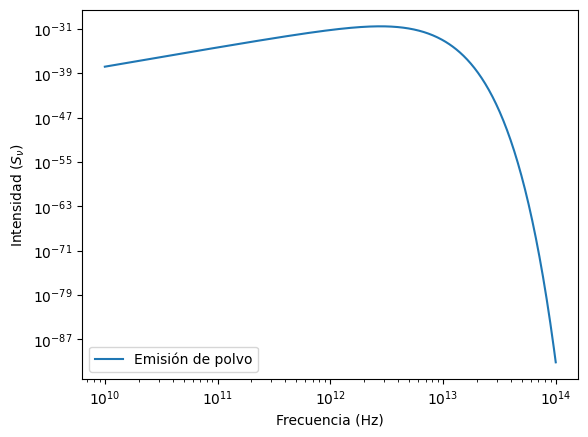

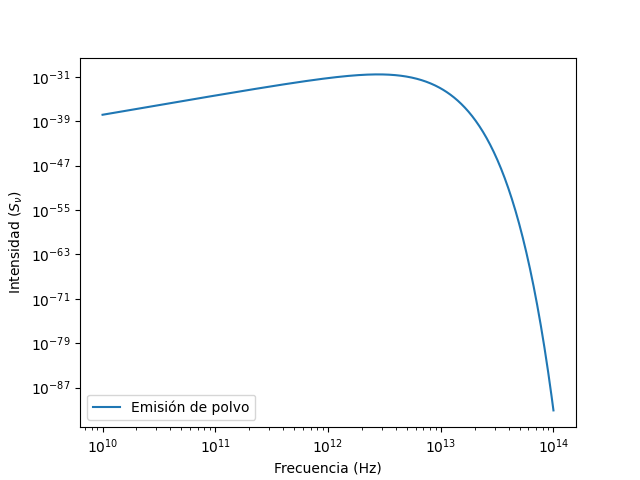

In [2]:
# Asegúrate de ejecutar esta línea antes de cualquier otra cosa
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constantes
c = 3e10  # Velocidad de la luz en cm/s
h = 6.626e-27  # Constante de Planck en erg*s
k = 1.38e-16  # Constante de Boltzmann en erg/K
beta = 1.5  # Índice de emisividad
nu_ref = 250e9  # Frecuencia de referencia en Hz
kappa_ref = 0.4  # Coeficiente de absorción de referencia en cm^2/g
mu_H = 1.67e-24  # Masa del hidrógeno en gramos

# Función Planck
def planck_function(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

# Ecuación del modelo de emisión de polvo
def dust_emission(nu, T_d, d, R_s, NH):
    Omega_s = np.pi * R_s**2 / d**2  # Ángulo sólido
    tau_nu = kappa_ref * (nu / nu_ref)**beta * NH * mu_H / 100  # Profundidad óptica
    B_nu = planck_function(nu, T_d)  # Función de Planck
    return B_nu * (1 - np.exp(-tau_nu)) * Omega_s

# Configuración inicial
nu = np.logspace(10, 14, 500)  # Frecuencia en Hz
T_d_init = 30  # Temperatura inicial en K
d_init = 1e27  # Distancia inicial en cm
R_s_init = 1e19  # Radio inicial en cm
NH_init = 1e21  # Densidad de columna inicial en cm^-2

# Crear figura y gráfico inicial
fig, ax = plt.subplots()
l, = ax.plot(nu, dust_emission(nu, T_d_init, d_init, R_s_init, NH_init), label="Emisión de polvo")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Intensidad ($S_\\nu$)')
ax.legend()

# Crear sliders usando ipywidgets
slider_Td = widgets.FloatSlider(value=T_d_init, min=10, max=100, step=1, description='T_d (K)')
slider_d = widgets.FloatLogSlider(value=d_init, base=10, min=26, max=28, step=0.01, description='d (cm)')
slider_Rs = widgets.FloatLogSlider(value=R_s_init, base=10, min=18, max=20, step=0.01, description='R_s (cm)')
slider_NH = widgets.FloatLogSlider(value=NH_init, base=10, min=21, max=23, step=0.01, description='NH (cm⁻²)')

# Actualizar función
def update(change):
    T_d = slider_Td.value
    d = slider_d.value
    R_s = slider_Rs.value
    NH = slider_NH.value
    l.set_ydata(dust_emission(nu, T_d, d, R_s, NH))
    fig.canvas.draw_idle()

# Conectar sliders con la función de actualización
slider_Td.observe(update, names='value')
slider_d.observe(update, names='value')
slider_Rs.observe(update, names='value')
slider_NH.observe(update, names='value')

# Mostrar los sliders y la figura
ui = widgets.VBox([slider_Td, slider_d, slider_Rs, slider_NH])
display(ui)
display(fig)